# Tema 2 - ML aplicat

## 1. Explorarea datelor

In [ ]:
%pip install numpy
%pip install matplotlib
%pip install pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Citirea datelor

In [113]:
def read_csv(file_path):
    """
    Funcția citește un fișier CSV și returnează un DataFrame Pandas
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"Fișierul '{file_path}' nu a fost găsit.")
    except pd.errors.EmptyDataError:
        print(f"Fișierul '{file_path}' este gol.")
    except pd.errors.ParserError:
        print(f"A existat o eroare la parsarea fișierului '{file_path}'.")
    except Exception as e:
        print(f"A apărut o eroare: {e}")

In [263]:
full_file = './tema2_SalaryPrediction/SalaryPrediction_full.csv'
train_file = './tema2_SalaryPrediction/SalaryPrediction_train.csv'
test_file = './tema2_SalaryPrediction/SalaryPrediction_test.csv'
    
# Citește datele din fișier
df = read_csv(full_file)
X_train = read_csv(train_file)
X_test = read_csv(test_file)

### Analiza atributelor numerice

In [64]:
def generate_numerical_atributes_statistic(df):
    """
    Funcția extrage statistici pentru atributele numerice continue și generează grafice Boxplot.

    :param df: DataFrame Pandas cu datele din fișierul CSV
    """

    # Afișează statisticile
    stats = df.describe(percentiles=[.25, .5, .75], include=[np.number])
    print("Statistici pentru atributele numerice continue:\n")
    print(stats, '\n')

    # Generează grafice Boxplot
    plt.figure(figsize=(10, 8))
    df.boxplot()
    plt.title('Boxplot pentru atributele numerice continue')
    plt.xticks(rotation=90)
    plt.show()

Statistici pentru atributele numerice continue:

                fnl          hpw          gain      edu_int        years  \
count  9.999000e+03  9199.000000   9999.000000  9999.000000  9999.000000   
mean   1.903529e+05    40.416241    979.853385    14.262026    38.646865   
std    1.060709e+05    12.517356   7003.795382    24.770835    13.745101   
min    1.921400e+04     1.000000      0.000000     1.000000    17.000000   
25%    1.182825e+05    40.000000      0.000000     9.000000    28.000000   
50%    1.784720e+05    40.000000      0.000000    10.000000    37.000000   
75%    2.373110e+05    45.000000      0.000000    13.000000    48.000000   
max    1.455435e+06    99.000000  99999.000000   206.000000    90.000000   

              loss           prod  
count  9999.000000    9999.000000  
mean     84.111411    2014.927593  
std     394.035484   14007.604496  
min       0.000000     -28.000000  
25%       0.000000      42.000000  
50%       0.000000      57.000000  
75%       0.00

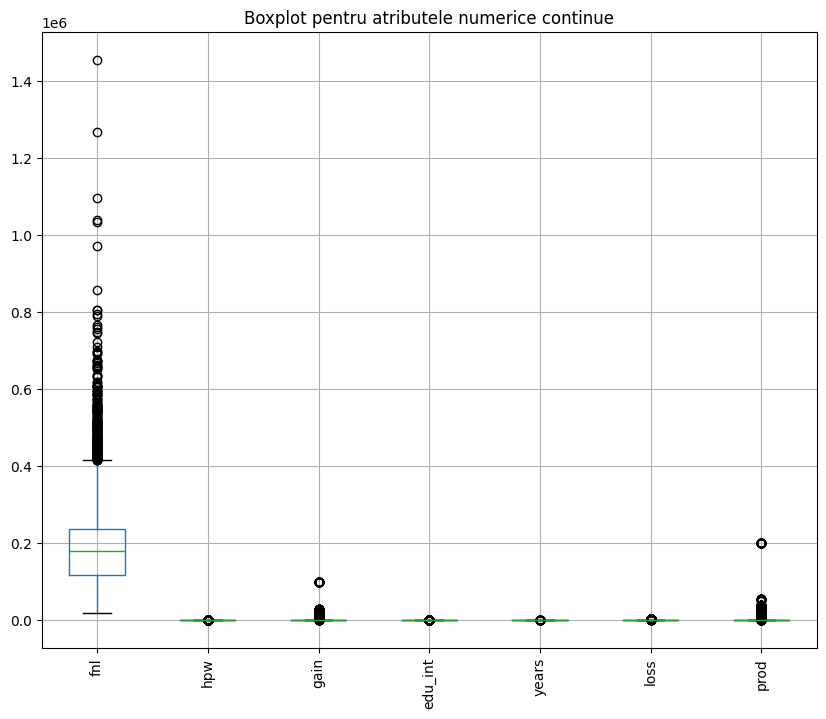

In [65]:
# Extrage statistici și generează grafice Boxplot
generate_numerical_atributes_statistic(df)

### Analiza atributelor categorice sau ordinale

In [50]:
def generate_discrete_atributes_statistics(df):
    """
    Funcția extrage statistici pentru atributele discrete sau ordinale.

    :param df: DataFrame Pandas cu datele din fișierul CSV
    """

    # Afișează statisticile
    print("Statistici pentru atributele discrete sau ordinale:\n")

    # Selectează coloanele discrete sau ordinale
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    stats_df = pd.DataFrame(columns=[
        'Atribut', 'Număr de exemple (fără valori lipsă)', 'Număr de valori unice'
    ])

    # Calculează statisticile pentru fiecare coloană discretă sau ordinală
    stats_list = []
    for col in categorical_columns:
        col_data = df[col]
        stats_list.append({
            'Atribut': col,
            'Număr de exemple (fără valori lipsă)': col_data.count(),
            'Număr de valori unice': col_data.nunique()
        })

    # Convertește lista de statistici într-un DataFrame
    stats_df = pd.DataFrame(stats_list)
    
    print(stats_df, "\n")


    #################### Varianta 2 ######################
    stats = df.describe(include=['O', 'category'])
    stats = stats.loc[['count', 'unique']]
    # print(stats, '\n')

    # Afișează histogramă
    for col in categorical_columns:
        # Obține seria de frecvență a valorilor unice
        col_value_counts = df[col].value_counts()
        # Crează o histogrmă cu frecvențele valorilor unice
        col_value_counts.hist()
    

Statistici pentru atributele discrete sau ordinale:

     Atribut  Număr de exemple (fără valori lipsă)  Număr de valori unice
0   relation                                  9999                      6
1    country                                  9999                     41
2        job                                  9999                     14
3  work_type                                  9999                      9
4    partner                                  9999                      7
5        edu                                  9999                     16
6     gender                                  9199                      2
7       race                                  9999                      5
8      gtype                                  9999                      2
9      money                                  9999                      2 



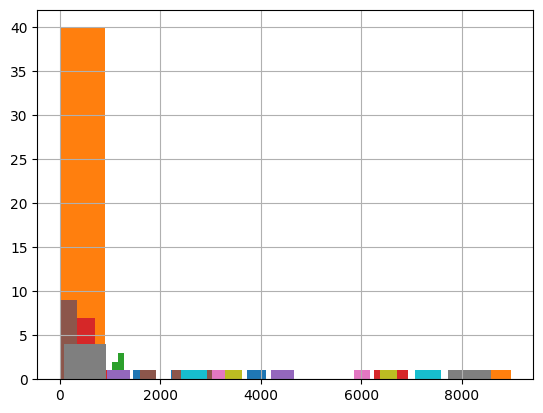

In [80]:
generate_discrete_atributes_statistics(df)

### Analiza corelației între atribute

In [72]:
def numerical_atributes_corelation_analysis(df):
    """
    Funcția analizează corelația între atributele numerice utilizând criteriul Pearson și
    afișează matricea de corelație utilizând matshow.

    :param df: DataFrame Pandas cu datele din fișierul CSV
    """
    # Selectează doar atributele numerice
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    df = df[numerical_columns]

    # Calculează matricea de corelație
    corr_matrix = df.corr()
    print("Matricea de corelație pentru atributele numerice:")
    print(corr_matrix, "\n")
    
    # Vizualizează matricea de corelație
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0, len(df.columns), 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels(df.columns)
    plt.show()


Matricea de corelație pentru atributele numerice:
              fnl       hpw      gain   edu_int     years      loss      prod
fnl      1.000000 -0.025606  0.003962  0.016926 -0.070322 -0.011453  0.003947
hpw     -0.025606  1.000000  0.096572  0.016341  0.068075  0.047413  0.096577
gain     0.003962  0.096572  1.000000  0.012155  0.084114 -0.029867  0.999998
edu_int  0.016926  0.016341  0.012155  1.000000 -0.001159  0.001615  0.012153
years   -0.070322  0.068075  0.084114 -0.001159  1.000000  0.045777  0.084161
loss    -0.011453  0.047413 -0.029867  0.001615  0.045777  1.000000 -0.029856
prod     0.003947  0.096577  0.999998  0.012153  0.084161 -0.029856  1.000000 



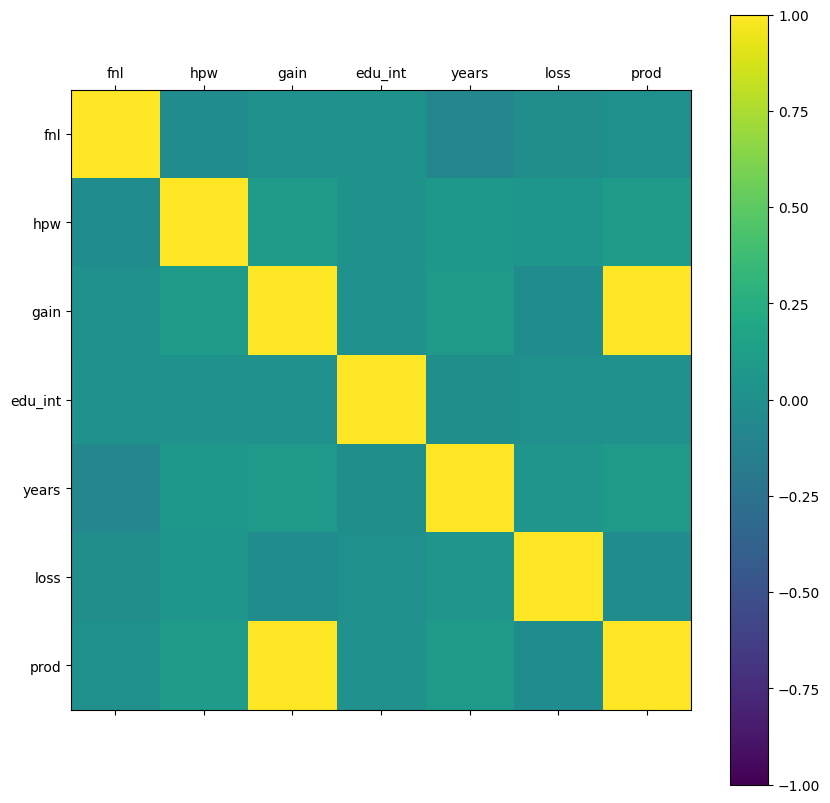

In [73]:
# Analizează corelația între atributele numerice
numerical_atributes_corelation_analysis(df)

In [91]:
from scipy.stats import chi2_contingency

def category_atributes_corelation_analysis(df):
    """
    Funcția analizează corelația între atributele categorice utilizând testul Chi-Pătrat.

    :param df: DataFrame Pandas cu datele din fișierul CSV
    """
    # Selectează coloanele categorice
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # Generează testele Chi-Pătrat pentru fiecare pereche de coloane categorice
    chi2_results = []
    for i, col1 in enumerate(categorical_columns):
        for col2 in categorical_columns[i + 1:]:
            CrosstabResult = pd.crosstab(index=df[col1], columns=df[col2])
            ChiSqResult = chi2_contingency(CrosstabResult)
            chi2_results.append({
                'Atribute': f"{col1} vs {col2}",
                'p-value': ChiSqResult[1]
            })

    # Convertește rezultatele într-un DataFrame
    chi2_df = pd.DataFrame(chi2_results)
    
    # Afișează rezultatele testului Chi-Pătrat
    print("Rezultatele testului Chi-Pătrat pentru atributele categorice:\n")
    print(chi2_df, "\n")

In [92]:
category_atributes_corelation_analysis(df)

Rezultatele testului Chi-Pătrat pentru atributele categorice:

                 Atribute        p-value
0     relation vs country   1.906490e-41
1         relation vs job  2.188860e-305
2   relation vs work_type  1.129110e-104
3     relation vs partner   0.000000e+00
4         relation vs edu  5.306209e-127
5      relation vs gender   0.000000e+00
6        relation vs race   1.697873e-86
7       relation vs gtype   0.000000e+00
8       relation vs money   0.000000e+00
9          country vs job   9.360832e-52
10   country vs work_type   1.695737e-01
11     country vs partner   1.738626e-26
12         country vs edu   0.000000e+00
13      country vs gender   7.644630e-03
14        country vs race   0.000000e+00
15       country vs gtype   3.472428e-03
16       country vs money   4.882322e-08
17       job vs work_type   0.000000e+00
18         job vs partner  1.810523e-181
19             job vs edu   0.000000e+00
20          job vs gender   0.000000e+00
21            job vs race   2.77281

## 2.  Preprocesarea datelor

### Date lipsă pentru un atribut într-un eșantion

In [211]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

def impute_missing_values(df, method: str):
    """
    Funcția completează valorile lipsă din DataFrame-ul dat.

    :param df: DataFrame Pandas cu datele din fișierul CSV
    :param method: Metoda de completare a valorilor lipsă (SimpleImputer, IterativeImputer)
    """
    
    # Verifică dacă metoda este validă
    if method not in ['SimpleImputer', 'IterativeImputer']:
        print(f"Metoda '{method}' nu este validă.")
        return

    # Copiază DataFrame-ul pentru a nu modifica originalul
    filled_df = df.copy(deep=True)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    category_columns = df.select_dtypes(include=['object', 'category']).columns

    # Completează valorile lipsă
    if method == 'SimpleImputer':
        # Selectează doar coloanele numerice

        # Completează valorile lipsă cu media
        imp = SimpleImputer(missing_values=np.nan, strategy='mean')
        filled_df[numeric_columns] = imp.fit_transform(filled_df[numeric_columns])

        # Completează valorile lipsă categorice cu valoarea cea mai frecventă
        imp = SimpleImputer(strategy="most_frequent")
        filled_df[category_columns] = imp.fit_transform(filled_df[category_columns])

        return filled_df
    else:
        # Completează valorile lipsă numerice folosind metoda IterativeImputer
        imp = IterativeImputer(max_iter=10, random_state=0, missing_values=np.nan)
        imp.fit(filled_df[numeric_columns])
        filled_df[numeric_columns] = imp.transform(filled_df[numeric_columns])

        # Completează valorile lipsă categorice cu valoarea cea mai frecventă
        # imp = IterativeImputer(max_iter=10, random_state=0, initial_strategy="most_frequent")
        # imp.fit(filled_df[category_columns])
        # filled_df[category_columns] = imp.transform(filled_df[category_columns])

        return filled_df

In [212]:
# Completează valorile lipsă folosind SimpleImputer
df_simple_filled = impute_missing_values(df, 'SimpleImputer')
# print(filled_df)
df_simple_filled.describe().loc['count']

fnl        9999.0
hpw        9999.0
gain       9999.0
edu_int    9999.0
years      9999.0
loss       9999.0
prod       9999.0
Name: count, dtype: float64

In [213]:
# Completează valorile lipsă folosind IterativeImputer
df_iterative_filled = impute_missing_values(df, 'IterativeImputer')
# print(filled_df)
df_iterative_filled.describe().loc['count']

fnl        9999.0
hpw        9999.0
gain       9999.0
edu_int    9999.0
years      9999.0
loss       9999.0
prod       9999.0
Name: count, dtype: float64

### Valori extreme pentru un atribut într-un eșantion

In [166]:
def detect_and_exclude_outliers(df):
    """
    Funcția detectează și elimină outlierii din DataFrame-ul dat.
    """
    # Selectează doar atributele numerice
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    threshold = 1.5

    # Elimină outlierii
    for col in numerical_columns:
        Q1 = df[col].quantile(0.1)
        Q3 = df[col].quantile(0.9)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Setați valorile care sunt în afara intervalului ca NaN
        df[col] = df[col].mask((df[col] < lower_bound) | (df[col] > upper_bound))

In [206]:
# Elimină outlierii
new_df = df.copy(deep=True)
detect_and_exclude_outliers(new_df)
new_df.describe().loc['count']

fnl        9983.0
hpw        9199.0
gain       9219.0
edu_int    9703.0
years      9999.0
loss       9549.0
prod       9219.0
Name: count, dtype: float64

In [207]:
# Imputare valori lipsă
new_df = impute_missing_values(df, 'IterativeImputer')
new_df.describe().loc['count']

fnl        9999.0
hpw        9999.0
gain       9999.0
edu_int    9999.0
years      9999.0
loss       9999.0
prod       9999.0
Name: count, dtype: float64

### Atribute redundante (puternic corelate)

### Standardizarea datelor

In [250]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

def normalize_data(X_train, X_test, method: str):
    """
    Funcția normalizează datele din DataFrame-ul dat.

    :param df: DataFrame Pandas cu datele din fișierul CSV
    :param method: Metoda de normalizare a datelor (StandardScaler, MinMaxScaler, RobustScaler)   
    """
    # Selectează doar atributele numerice
    numerical_columns = X_train.select_dtypes(include=[np.number]).columns

    # Normalizează datele
    if method == 'StandardScaler':
        scaler = preprocessing.StandardScaler().fit(X_train[numerical_columns])
        scaler.mean_
        scaler.scale_

        X_train_minmax = X_train
        X_test_minmax = X_test
        
        X_train_minmax[numerical_columns] = scaler.transform(X_train[numerical_columns])
        X_test_minmax[numerical_columns] = scaler.transform(X_test[numerical_columns])

        return X_train_minmax, X_test_minmax

    elif method == 'MinMaxScaler':
        max_abs_scaler = preprocessing.MaxAbsScaler()

        X_train_maxabs = X_train
        X_test_maxabs = X_test

        X_train_maxabs[numerical_columns] = max_abs_scaler.fit_transform(X_train[numerical_columns])
        X_test_maxabs[numerical_columns] = max_abs_scaler.transform(X_test[numerical_columns])

        return X_train_maxabs, X_test_maxabs

    elif method == 'RobustScaler':
        robust_scaler = preprocessing.RobustScaler()

        X_train_robust = X_train
        X_test_robust = X_test

        X_train_robust[numerical_columns] = robust_scaler.fit_transform(X_train[numerical_columns])
        X_test_robust[numerical_columns] = robust_scaler.transform(X_test[numerical_columns])

        return X_train_robust, X_test_robust
        

In [255]:
# Datele originale
X_train = read_csv(train_file)
X_test = read_csv(test_file)

X_train = impute_missing_values(X_train, method='SimpleImputer')
X_test = impute_missing_values(X_test, method='SimpleImputer')

print(X_train)

           fnl        hpw relation  gain        country                job  \
0     264627.0  40.000000     NotM   0.0  United-States       Adm-clerical   
1     151369.0  40.000000     NotF   0.0  United-States       Craft-repair   
2     188615.0  60.000000        H   0.0  United-States              Sales   
3     151089.0  55.000000        H   0.0  United-States    Exec-managerial   
4     177625.0  40.000000     NotF   0.0  United-States  Machine-op-inspct   
...        ...        ...      ...   ...            ...                ...   
7994  301614.0  48.000000        H   0.0  United-States    Protective-serv   
7995   50122.0  50.000000     OwnC   0.0  United-States              Sales   
7996   78022.0  40.000000        H   0.0  United-States       Adm-clerical   
7997   34574.0  43.000000        H   0.0  United-States   Transport-moving   
7998  400132.0  40.307404        H   0.0  United-States    Protective-serv   

      edu_int  years    loss work_type partner  edu gender   ra

In [258]:
# Citește datele
X_train = read_csv(train_file)
X_test = read_csv(test_file)

# Imupută valorile lipsă
X_train = impute_missing_values(X_train, method='SimpleImputer')
X_test = impute_missing_values(X_test, method='SimpleImputer')

# Normalizează datele folosind StandardScaler
X_train, X_test = normalize_data(X_test, X_train, 'StandardScaler')
print(X_train)

           fnl       hpw relation      gain        country                job  \
0     2.050886 -0.864440        H  0.243080  United-States                  ?   
1    -0.821772 -0.064625    Other -0.138995  United-States       Tech-support   
2    -0.046235 -0.064625        H -0.138995  United-States    Exec-managerial   
3     1.400660 -0.064625        H -0.138995           Hong    Protective-serv   
4    -0.867612  0.335283        H -0.138995  United-States   Transport-moving   
...        ...       ...      ...       ...            ...                ...   
1995 -0.023420 -0.064625        H -0.138995  United-States  Machine-op-inspct   
1996  2.010903  0.335283     OwnC -0.138995  United-States  Machine-op-inspct   
1997 -0.981906 -1.664256    Other -0.138995  United-States              Sales   
1998 -1.598359  0.335283        H -0.138995  United-States  Machine-op-inspct   
1999 -0.935359 -0.064625        H -0.138995  United-States       Craft-repair   

       edu_int     years   

In [260]:
# Citește datele
X_train = read_csv(train_file)
X_test = read_csv(test_file)

# Imupută valorile lipsă
X_train = impute_missing_values(X_train, method='SimpleImputer')
X_test = impute_missing_values(X_test, method='SimpleImputer')

# Normalizează datele folosind MinMaxScaler
X_train, X_test = normalize_data(X_test, X_train, 'MinMaxScaler')
print(X_train)

           fnl       hpw relation     gain        country                job  \
0     0.391592  0.303030        H  0.02414  United-States                  ?   
1     0.100583  0.404040    Other  0.00000  United-States       Tech-support   
2     0.179147  0.404040        H  0.00000  United-States    Exec-managerial   
3     0.325722  0.404040        H  0.00000           Hong    Protective-serv   
4     0.095940  0.454545        H  0.00000  United-States   Transport-moving   
...        ...       ...      ...      ...            ...                ...   
1995  0.181459  0.404040        H  0.00000  United-States  Machine-op-inspct   
1996  0.387541  0.454545     OwnC  0.00000  United-States  Machine-op-inspct   
1997  0.084361  0.202020    Other  0.00000  United-States              Sales   
1998  0.021913  0.454545        H  0.00000  United-States  Machine-op-inspct   
1999  0.089077  0.404040        H  0.00000  United-States       Craft-repair   

       edu_int     years  loss work_typ

In [262]:
# Citește datele
X_train = read_csv(train_file)
X_test = read_csv(test_file)

# Imupută valorile lipsă
X_train = impute_missing_values(X_train, method='SimpleImputer')
X_test = impute_missing_values(X_test, method='SimpleImputer')

# Normalizează datele folosind RobustScaler
X_train, X_test = normalize_data(X_test, X_train, 'RobustScaler')
print(X_train)

           fnl  hpw relation    gain        country                job  \
0     1.938168 -2.0        H  2414.0  United-States                  ?   
1    -0.649906  0.0    Other     0.0  United-States       Tech-support   
2     0.048800  0.0        H     0.0  United-States    Exec-managerial   
3     1.352357  0.0        H     0.0           Hong    Protective-serv   
4    -0.691205  1.0        H     0.0  United-States   Transport-moving   
...        ...  ...      ...     ...            ...                ...   
1995  0.069355  0.0        H     0.0  United-States  Machine-op-inspct   
1996  1.902145  1.0     OwnC     0.0  United-States  Machine-op-inspct   
1997 -0.794177 -4.0    Other     0.0  United-States              Sales   
1998 -1.349560  1.0        H     0.0  United-States  Machine-op-inspct   
1999 -0.752241  0.0        H     0.0  United-States       Craft-repair   

      edu_int     years  loss work_type partner  edu gender  \
0       -0.25  1.382716   0.0         ?     MCS 

## 3. Utilizarea algoritmilor de Învățare Automată

### Regresie Logistică

### Multi-Layered Perceptron (MLP)

## Evaluarea algoritmilor

In [ ]:
# Citirea datelor

# Preprocesarea datelor

# Utilizarea unui model de regresie pentru a prezice salariul

# Utilizarea unui model MLP pentru a prezice salariul